In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve

In [2]:
#Reading the data both train and validation data
train = pd.read_csv("Training_data_Jenfi_assessment_070423.csv")
test = pd.read_csv("Test_data_Jenfi_assessment_070423.csv")

In [3]:
#used to display the rows
train.head()

,Unnamed: 0,M1,M2,M3,M4,M5,M6,M7,M8,M9,...,M143,M144,M145,M146,M147,M148,M149,M150,M151,target
0,320,2.240789e+08,0.0,0.0,8.142857,1.5,2.857143,2.387105,5.720456e+07,0.0,...,0.142857,1.428571,5.943793e+06,3.714286,8.0,1.137554,NaN,8.426000,0.914831,0
1,556,5.454261e+06,6138990.0,0.0,5.142857,NaN,0.285714,1.029878,1.694720e+08,0.0,...,0.285714,1.285714,4.264630e+06,2.600000,10.0,0.940661,2.000506,inf,1.016467,1
2,421,2.359738e+07,1272552.0,0.0,3.428571,NaN,4.000000,1.103578,1.852271e+07,16.0,...,6.714286,9.142857,1.321201e+07,6.500000,13.0,1.007713,0.502552,1.157555,0.988912,0
3,184,2.243215e+08,0.0,0.0,3.285714,NaN,10.714286,NaN,1.050155e+06,0.0,...,0.000000,6.000000,7.029361e+08,11.500000,0.0,1.504471,2.827495,0.670929,0.483688,0
4,496,6.892245e+07,0.0,0.0,3.285714,1.0,1.857143,0.000000,NaN,0.0,...,0.000000,0.142857,1.230383e+06,0.833333,2.0,inf,inf,NaN,0.600029,1


In [4]:
#Checking the proportion of missing values in each column of train data

missing_values_count = train.isnull().sum()
total_values = train.size
missing_values_percent = (missing_values_count / total_values) * 100
missing_values_percent.sort_values(ascending=False)

M72       0.511247
M5        0.485184
M36       0.479169
M49       0.459120
M46       0.413008
            ...   
M69       0.000000
M68       0.000000
M66       0.000000
M61       0.000000
target    0.000000
Length: 153, dtype: float64

In [5]:
#Check for the columns which have null values more than 50%

drop_col = []
for i in list(train.columns):
    if (train[i].isnull().sum()/len(train)) > .50:
        drop_col.append(i)
drop_col

['M5',
 'M7',
 'M25',
 'M30',
 'M33',
 'M36',
 'M39',
 'M40',
 'M46',
 'M49',
 'M64',
 'M72']

In [6]:
#Dropping the columns which have more than 50% missing values
train.drop(drop_col,axis=1,inplace=True)
train.drop(["Unnamed: 0"],axis=1,inplace=True)

In [7]:
#after dropping there are still 2455 null values present 
train.isnull().sum().sum()

2455

In [8]:
#inf values are present in the data 
np.isinf(train).sum().sum()

134

In [9]:
#replace infinite values with large finite values

train.replace([np.inf, -np.inf], [1e10, -1e10],inplace=True)

#Print the updated dataframe
print(np.isnan(train).sum().sum())

2455


# Train KNN Imputation

In [10]:
from sklearn.impute import KNNImputer

#knn inmputer with k=3

imputer = KNNImputer(n_neighbors=3)

#Perform KNN imputation on the dataframe

train_imputed = pd.DataFrame(imputer.fit_transform(train), columns=train.columns)

train_imputed 

,M1,M2,M3,M4,M6,M8,M9,M10,M11,M12,...,M143,M144,M145,M146,M147,M148,M149,M150,M151,target
0,2.240789e+08,0.000000e+00,0.000000,8.142857,2.857143,5.720456e+07,0.0,6.512465e+08,6.579251e+07,1.430925e+09,...,0.142857,1.428571,5.943793e+06,3.714286,8.0,1.137554e+00,9.886249e-01,8.426000e+00,0.914831,0.0
1,5.454261e+06,6.138990e+06,0.000000,5.142857,0.285714,1.694720e+08,0.0,4.020155e+08,0.000000e+00,0.000000e+00,...,0.285714,1.285714,4.264630e+06,2.600000,10.0,9.406614e-01,2.000506e+00,1.000000e+10,1.016467,1.0
2,2.359738e+07,1.272552e+06,0.000000,3.428571,4.000000,1.852271e+07,16.0,1.249106e+08,4.437133e+07,5.518678e+08,...,6.714286,9.142857,1.321201e+07,6.500000,13.0,1.007713e+00,5.025517e-01,1.157555e+00,0.988912,0.0
3,2.243215e+08,0.000000e+00,0.000000,3.285714,10.714286,1.050155e+06,0.0,1.362655e+06,2.315571e+08,0.000000e+00,...,0.000000,6.000000,7.029361e+08,11.500000,0.0,1.504471e+00,2.827495e+00,6.709289e-01,0.483688,0.0
4,6.892245e+07,0.000000e+00,0.000000,3.285714,1.857143,1.382018e+07,0.0,4.000181e+08,0.000000e+00,1.800000e+06,...,0.000000,0.142857,1.230383e+06,0.833333,2.0,1.000000e+10,1.000000e+10,1.323948e+00,0.600029,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,3.725053e+08,1.270501e+09,0.000000,2.142857,3.000000,7.312941e+08,6.0,1.912148e+09,1.113988e+09,5.187566e+09,...,3.000000,0.714286,2.409342e+08,4.666667,12.0,1.113785e+00,5.270956e-01,3.417014e-01,1.688512,1.0
322,4.540663e+06,0.000000e+00,0.000000,0.428571,0.857143,6.717713e+06,0.0,5.918892e+07,0.000000e+00,1.030385e+09,...,0.000000,1.142857,6.323157e+04,2.000000,4.0,1.094887e+00,9.370006e-01,1.784111e+01,1.000324,1.0
323,4.274472e+08,0.000000e+00,0.000000,4.714286,7.285714,2.077471e+08,13.0,2.376957e+09,5.364363e+08,7.036526e+09,...,4.000000,2.571429,9.470093e+08,8.333333,8.0,7.625549e-01,9.815813e-01,1.124195e+00,0.840027,1.0
324,4.370733e+07,0.000000e+00,0.000000,0.714286,0.285714,1.488749e+07,0.0,1.587773e+08,1.197947e+07,5.912183e+07,...,0.000000,11.000000,0.000000e+00,1.000000,0.0,0.000000e+00,9.996676e-01,1.021940e+00,0.000000,1.0


In [11]:
#Checking the proportion of missing values in each column of train data

missing_values_count = train_imputed.isnull().sum()
total_values = train_imputed.size
missing_values_percent = (missing_values_count / total_values) * 100
missing_values_percent.sort_values(ascending=False)

M1        0.0
M109      0.0
M103      0.0
M104      0.0
M105      0.0
         ... 
M51       0.0
M50       0.0
M48       0.0
M47       0.0
target    0.0
Length: 140, dtype: float64

In [12]:
#Check for the columns which have null values more than 50%

drop_col = []
for i in list(test.columns):
    if (test[i].isnull().sum()/len(test)) > .50:
        drop_col.append(i)
drop_col

#Dropping the columns which have more than 50% missing values
test.drop(drop_col,axis=1,inplace=True)
test.drop(["Unnamed: 0"],axis=1,inplace=True)

In [13]:
#replace infinite values with large finite values

test.replace([np.inf, -np.inf], [1e10, -1e10],inplace=True)

#Print the updated dataframe
print(np.isinf(test).sum().sum())

0


# KNN imputation on Test|

In [14]:
from sklearn.impute import KNNImputer

#knn inmputer with k=3

imputer = KNNImputer(n_neighbors=3)

#Perform KNN imputation on the dataframe

test_imputed = pd.DataFrame(imputer.fit_transform(test), columns=test.columns)

test_imputed.isnull().sum().sum()

0

In [15]:
train_imputed.isnull().sum().sum()

0

In [16]:
train.target.value_counts()

target
1    245
0     81
Name: count, dtype: int64

# Apply Logistic Regression as Base Model

In [17]:
feature = train_imputed.drop(["target"],axis=1)  #predictors
target = train_imputed["target"] #target

## Scaling the data

In [18]:
from sklearn.preprocessing import StandardScaler

col_name = feature.columns
ss = StandardScaler()
feature = ss.fit_transform(feature)
feature = pd.DataFrame(feature, columns= col_name)

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.30, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.30, random_state=0)

In [20]:
logreg = LogisticRegression(solver='newton-cg', class_weight='balanced')
logreg.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', solver='newton-cg')

In [21]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.70


In [22]:
metrics.f1_score(y_test,y_pred),metrics.precision_score(y_test,y_pred),metrics.recall_score(y_test,y_pred)

(0.7972027972027972, 0.890625, 0.7215189873417721)

# Calculating IV and WOE

In [23]:
#import monotonic binning to automatically calculate IV values for numeric values
from monotonic_binning.monotonic_woe_binning import Binning

In [24]:
var = "M1" # variable to be binned
y_var = "target" # the target variable

bin_object = Binning(y_var, n_threshold = 50, y_threshold = 10, p_threshold = 0.35, sign=False)
bin_object.fit(train_imputed[[y_var, var]])

# Print WOE summary
print(bin_object.woe_summary)

# The bin cut-points in an array
print(bin_object.bins)

             M1  nsamples     means   bads  goods  dist_good  dist_bad  WOE_M1  IV_components  M1_shift                   labels
0  1.383527e+10     326.0  0.751534  245.0   81.0        1.0       1.0     0.0            0.0      -inf  -inf-13835273897.428572
[          -inf 1.38352739e+10            inf]


In [25]:
np.sum(bin_object.woe_summary['IV_components'])

0.0

In [26]:
bin_object.woe_summary

,M1,nsamples,means,bads,goods,dist_good,dist_bad,WOE_M1,IV_components,M1_shift,labels
0,1.383527e+10,326.0,0.751534,245.0,81.0,1.0,1.0,0.0,0.0,-inf,-inf-13835273897.428572


In [27]:
traincols=train_imputed.columns.drop(['target'])
traincols

Index(['M1', 'M2', 'M3', 'M4', 'M6', 'M8', 'M9', 'M10', 'M11', 'M12',
       ...
       'M142', 'M143', 'M144', 'M145', 'M146', 'M147', 'M148', 'M149', 'M150', 'M151'], dtype='object', length=139)

In [28]:
variable=[]
for i in traincols:
    var = i # variable to be binned
    y_var = "target" # the target variable

    bin_object = Binning(y_var, n_threshold = 50, y_threshold = 10, p_threshold = 0.35, sign=False)
    bin_object.fit(train_imputed[[y_var, var]])
    if np.sum(bin_object.woe_summary['IV_components'])>0.1:
        variable.append(i)
    # Print WOE summary
    print(i,": ",np.sum(bin_object.woe_summary['IV_components']))

M1 :  0.0
M2 :  0.0
M3 :  0.005476144717159458
M4 :  0.0
M6 :  0.0
M8 :  0.0
M9 :  0.0
M10 :  0.0
M11 :  0.0
M12 :  0.006393974135392604
M13 :  0.0
M14 :  0.0
M15 :  0.198591166165609
M16 :  0.0
M17 :  0.0
M18 :  0.0
M19 :  0.0
M20 :  0.0
M21 :  0.0
M22 :  0.0
M23 :  0.0
M24 :  0.0
M26 :  0.0
M27 :  0.0
M28 :  0.3326202083411199
M29 :  0.0
M31 :  0.0
M32 :  0.0
M34 :  0.17575055029208048
M35 :  0.0
M37 :  0.0
M38 :  0.0
M41 :  0.0
M42 :  0.0
M43 :  0.0
M44 :  0.0
M45 :  0.0
M47 :  0.0
M48 :  0.0
M50 :  0.0
M51 :  0.0
M52 :  0.0070379885762403786
M53 :  0.18505705648670023
M54 :  0.0
M55 :  0.0
M56 :  0.0
M57 :  0.0
M58 :  0.05674508903695746
M59 :  0.0
M60 :  0.0
M61 :  0.0
M62 :  0.0
M63 :  0.43171510418120995
M65 :  0.0
M66 :  0.32165827407538605
M67 :  0.0
M68 :  0.0
M69 :  0.18546617153585138
M70 :  0.0
M71 :  0.003781395656263572
M73 :  0.0
M74 :  0.0
M75 :  0.0
M76 :  0.0
M77 :  0.0
M78 :  0.0
M79 :  0.0
M80 :  0.0
M81 :  0.0
M82 :  0.0
M83 :  0.0
M84 :  0.0
M85 :  0.0
M86 :  0.0

In [29]:
variable

['M15',
 'M28',
 'M34',
 'M53',
 'M63',
 'M66',
 'M69',
 'M87',
 'M88',
 'M95',
 'M124',
 'M127',
 'M148']

# EDA for most significant variable 

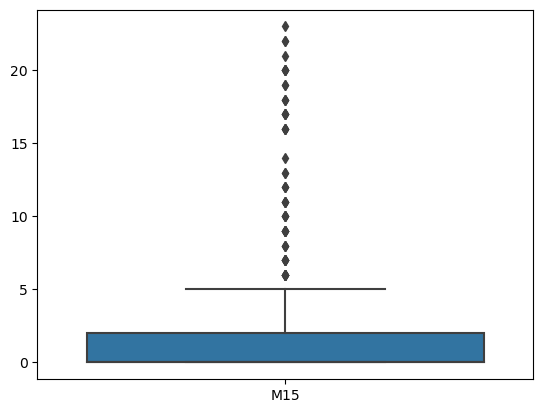

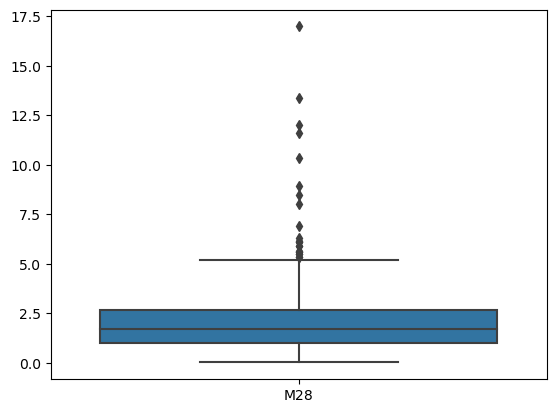

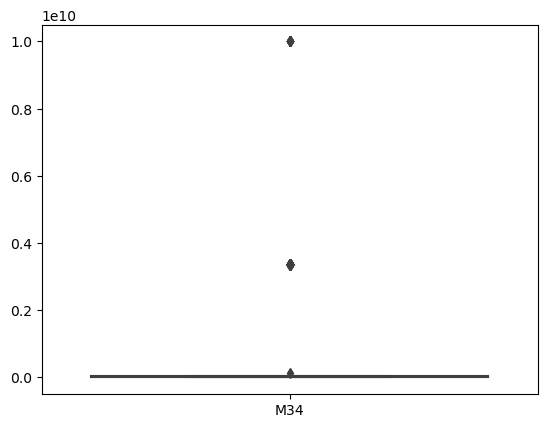

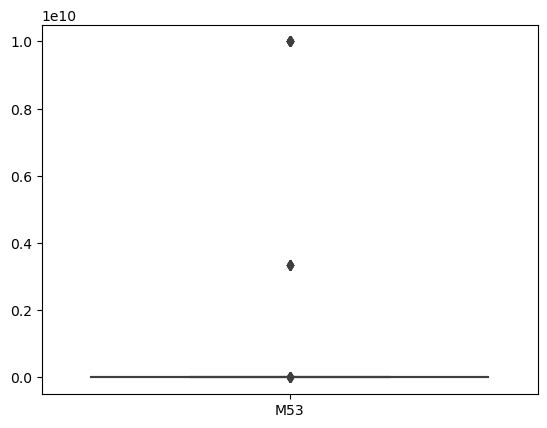

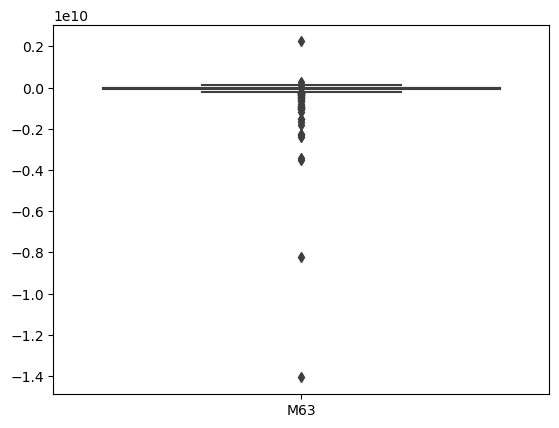

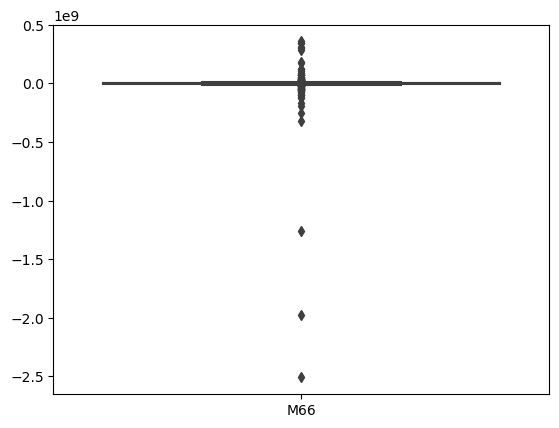

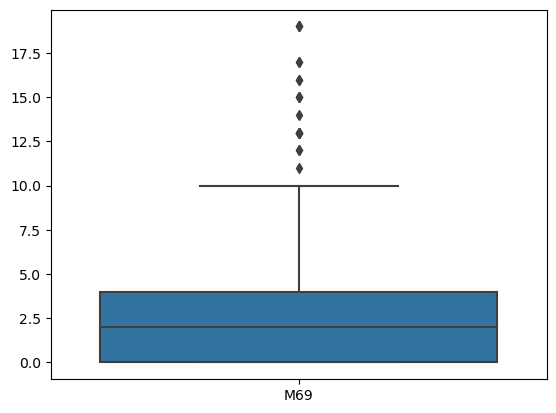

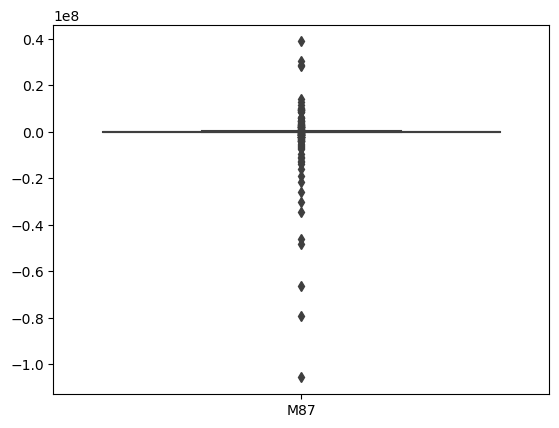

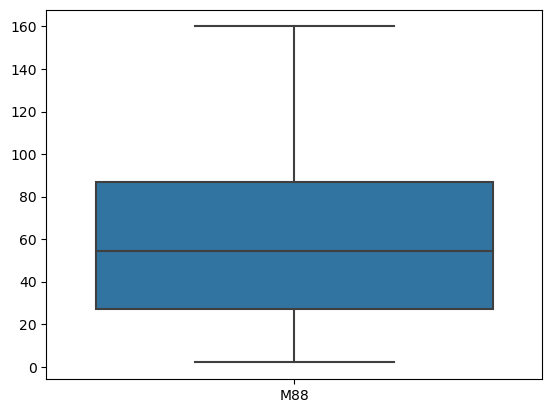

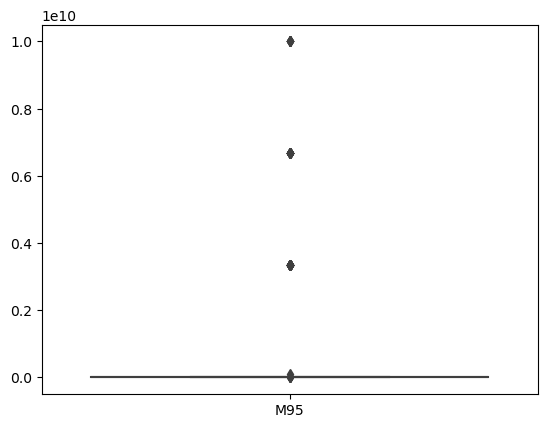

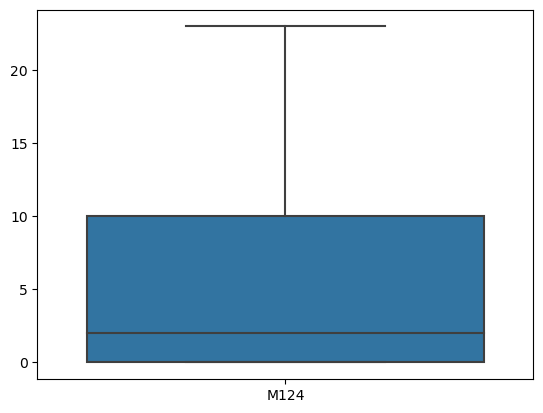

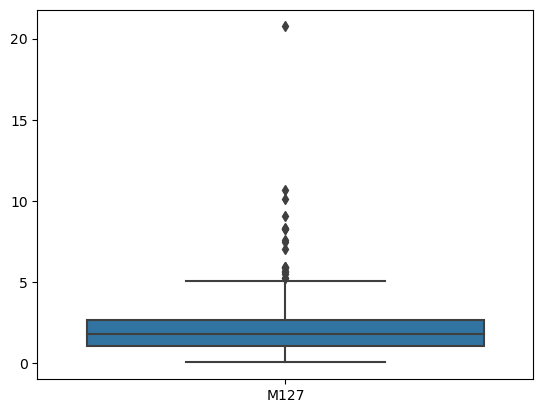

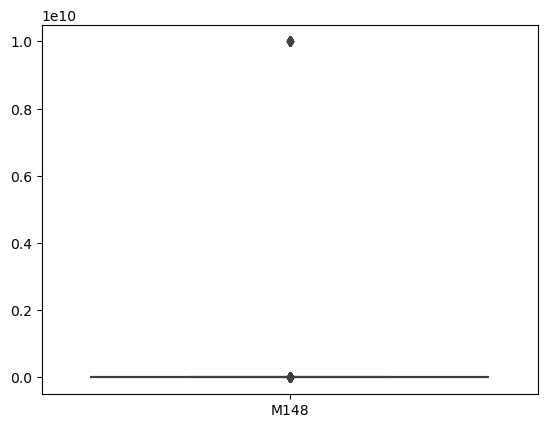

In [30]:
for i in variable:
    plot=sns.boxplot(train_imputed[[i]])
    plt.show(plot)

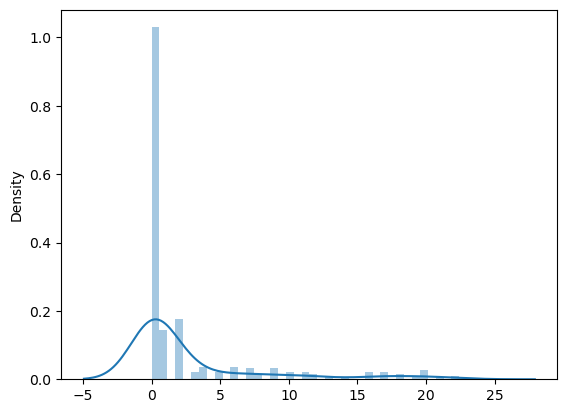

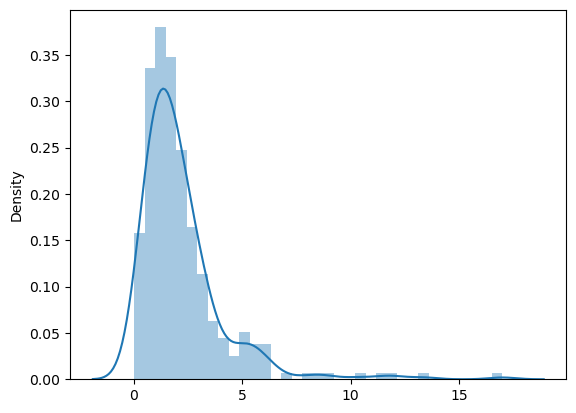

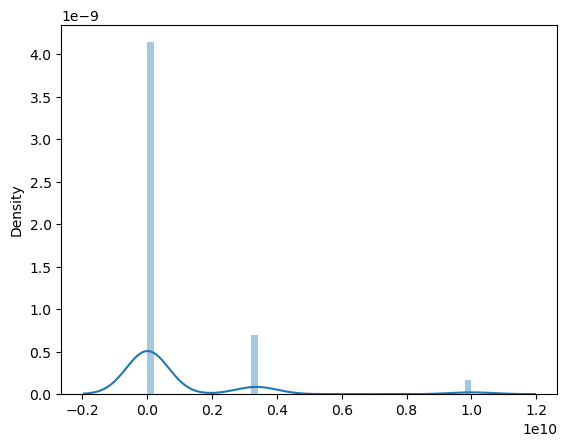

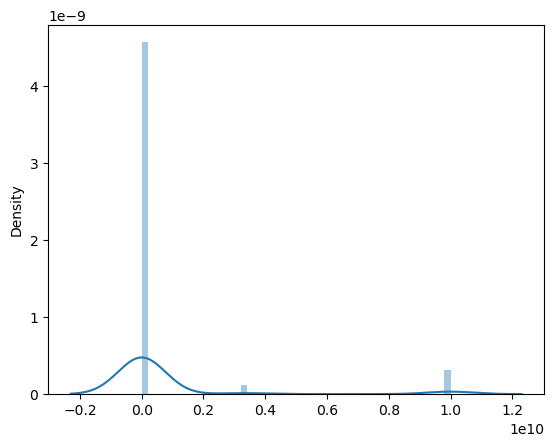

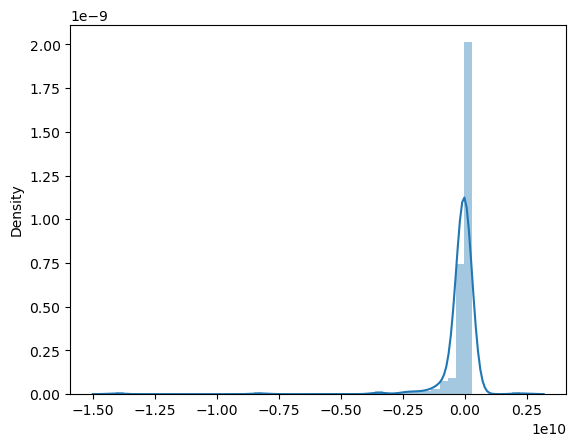

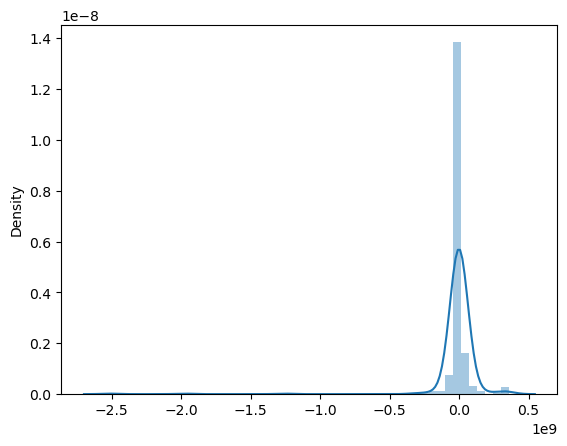

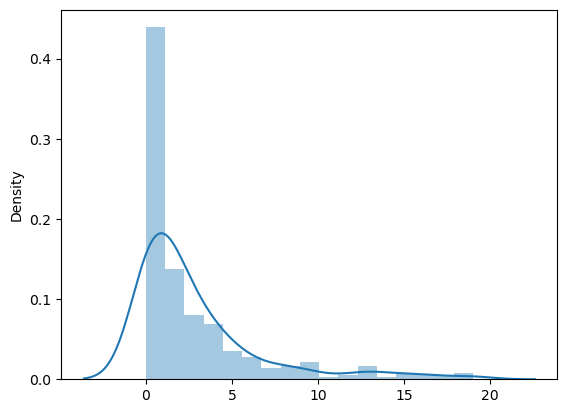

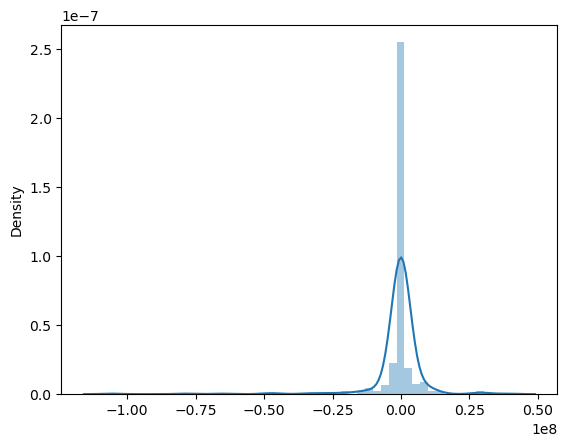

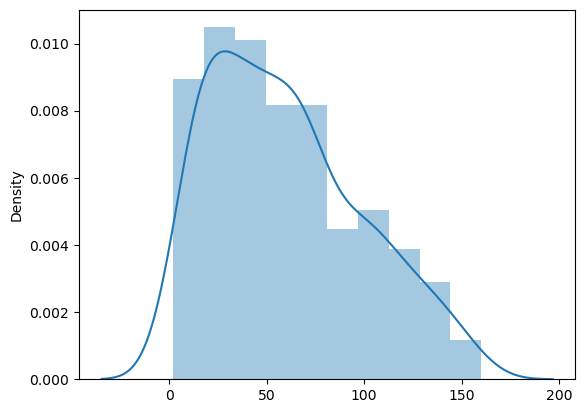

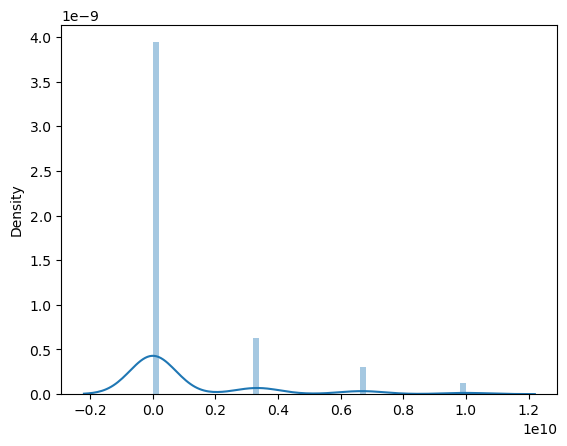

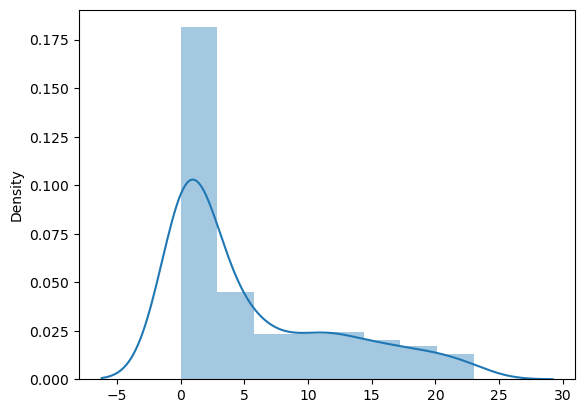

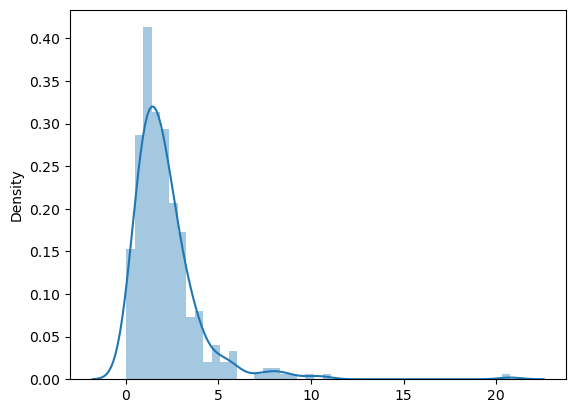

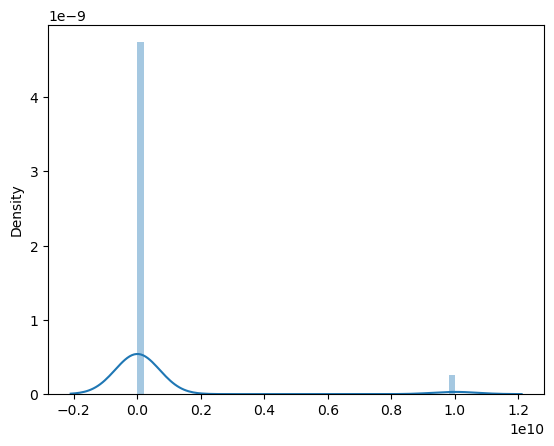

In [31]:
for i in variable:
    plot=sns.distplot(train_imputed[[i]])
    plt.show(plot)

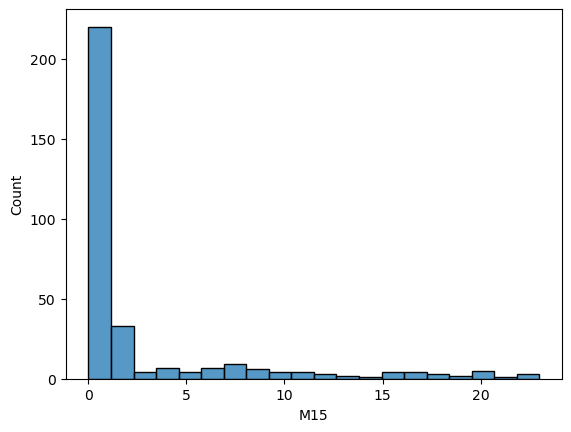

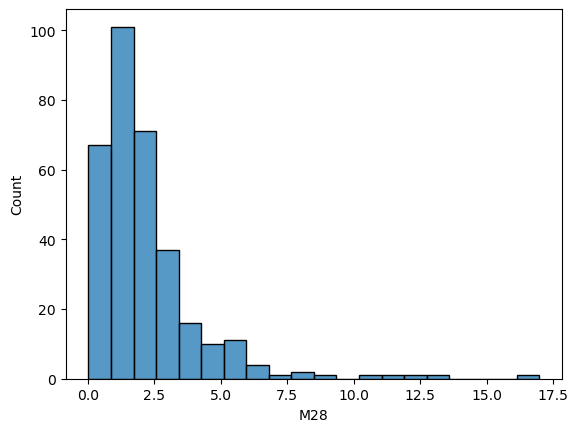

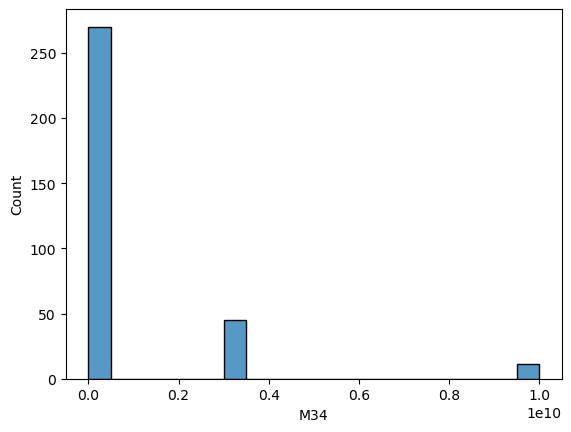

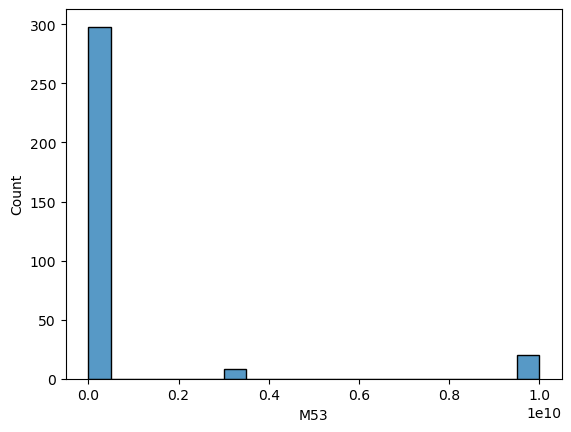

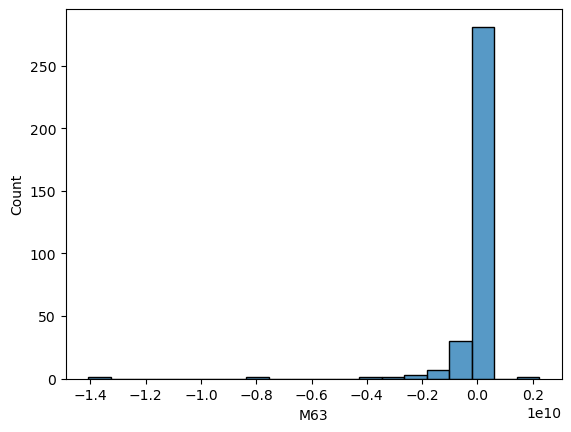

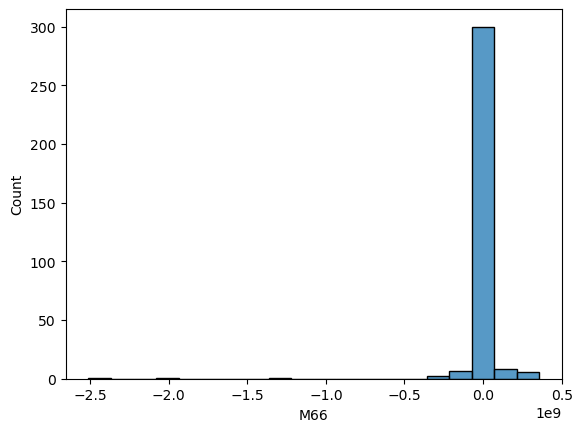

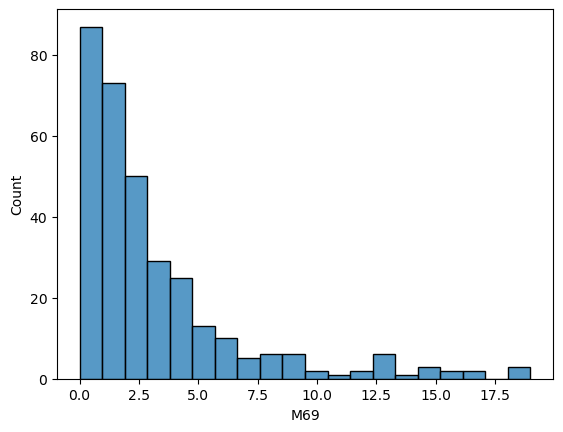

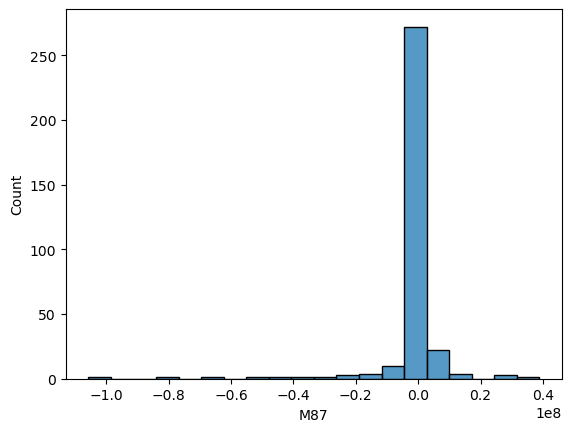

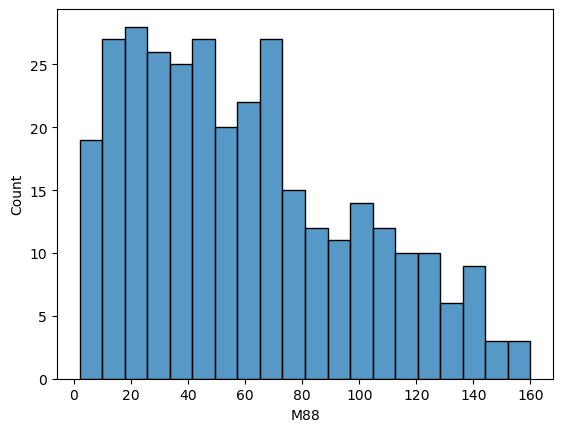

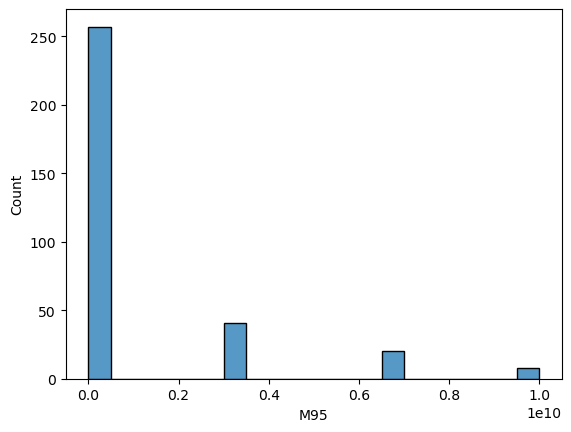

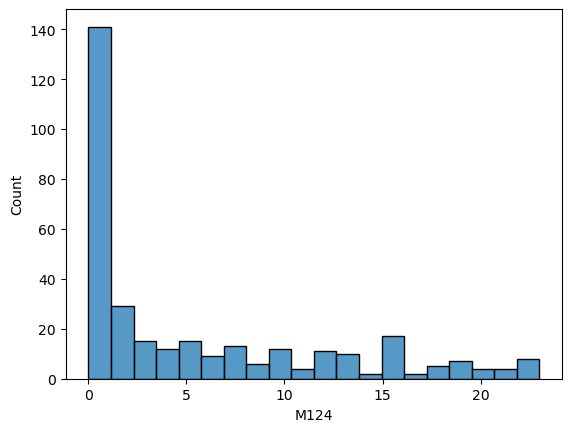

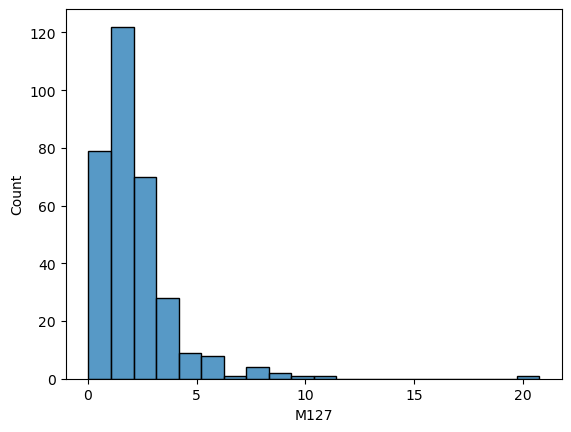

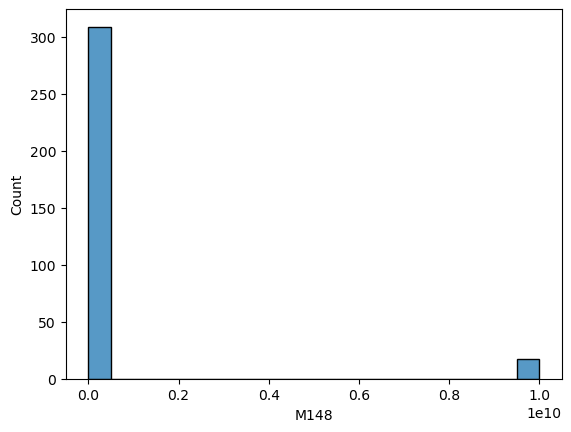

In [32]:
for i in variable:
    plot=sns.histplot(data=train_imputed, x=i, bins=20)
    plt.show(plot)

# Observation
Outliers: presence of outliers in the dataset

Imputed missing values with knn imputation with k value=3

Dropped variables with more than 50% missing values

Used IV to find most important predictors more than iv values=0.10


# Anova Test

H0: There is no significant difference between the means of the groups.

Ha: There is a significant difference between the means of the groups.

In [33]:
from scipy.stats import f_oneway

for i in variable:
    # Perform ANOVA test
    groups = [train_imputed[train_imputed['target'] == group][i] for group in train_imputed['target'].unique()]
    stat, p = f_oneway(*groups)
    # Print the test results
    print(i,'variable')
    print(f"Test statistic: {stat}")
    print(f"P-value: {p}")
    if p<0.05:
        print(f"The feature {i} is statistically significant")
    else:
        print(f"The feature {i} is not statistically significant")
    print('-'*100)


###### Results of Annova Test:
# - All the nummerical features are significant in prediction of target variable y.

M15 variable
Test statistic: 8.926881666216337
P-value: 0.0030245997585360757
The feature M15 is statistically significant
----------------------------------------------------------------------------------------------------
M28 variable
Test statistic: 2.7678100592236596
P-value: 0.09714452836422188
The feature M28 is not statistically significant
----------------------------------------------------------------------------------------------------
M34 variable
Test statistic: 2.38279097055947
P-value: 0.12365431798555807
The feature M34 is not statistically significant
----------------------------------------------------------------------------------------------------
M53 variable
Test statistic: 0.46539047620836776
P-value: 0.49560284762058016
The feature M53 is not statistically significant
----------------------------------------------------------------------------------------------------
M63 variable
Test statistic: 0.0028370037656884873
P-value: 0.9575547622043556
The feature M63 i

In [34]:
statistically_significant=['M15','M69','M87','M88','M95','M124']

In [35]:
train_imputed[statistically_significant]

,M15,M69,M87,M88,M95,M124
0,0.0,1.0,596624.0,34.0,5.078871e-02,6.0
1,4.0,2.0,22000.0,80.0,5.242413e-01,1.0
2,0.0,1.0,3300.0,22.0,9.469418e-01,0.0
3,1.0,1.0,-3463893.0,22.0,3.317987e-08,12.0
4,0.0,2.0,14300.0,65.0,3.333333e+09,20.0
...,...,...,...,...,...,...
321,1.0,0.0,82500.0,39.0,1.258229e+00,0.0
322,11.0,1.0,-2556.0,98.0,9.959442e-01,2.0
323,0.0,0.0,155194.0,17.0,9.143011e-01,0.0
324,3.0,1.0,-32000.0,36.0,6.666667e+09,21.0


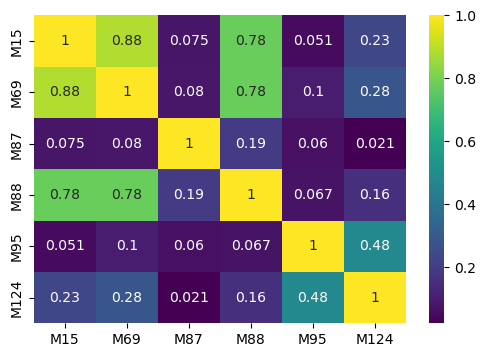

In [36]:
# Correlation Matrix
plt.figure(figsize=(6,4))
sns.heatmap(train_imputed[statistically_significant].corr(),annot=True,cmap='viridis');

In [37]:
# load statmodels functions
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# compute the vif for all given features
def compute_vif(statistically_significant):
    
    X = train_imputed[statistically_significant]
    # the calculation of variance inflation requires a constant
    X['intercept'] = 1
    
    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

In [38]:
compute_vif(statistically_significant)

,Variable,VIF
0,M15,5.010951
1,M69,5.185062
2,M87,1.057151
3,M88,2.966949
4,M95,1.321610
5,M124,1.426241


In [39]:
X=train_imputed[['M87','M88','M95','M124']] #We have best features for the model for train data
y=train_imputed['target']

In [40]:
X_test = test_imputed[['M87','M88','M95','M124']] #We have best features for the model for test data
y_test = test_imputed['target']

# Checking Logisitic Model without SMOTE

In [44]:
X_train, y_train = (X,y)
logreg = LogisticRegression(solver='newton-cg', class_weight='balanced')
logreg.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', solver='newton-cg')

In [45]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

metrics.f1_score(y_test,y_pred),metrics.precision_score(y_test,y_pred),metrics.recall_score(y_test,y_pred)

Accuracy of logistic regression classifier on test set: 0.70


(0.7678571428571428, 0.8775510204081632, 0.6825396825396826)

In [46]:
roc_auc_score(y_test, y_pred)

0.7212698412698413

# SMOTE 

In [43]:
from imblearn.over_sampling import SMOTE

# Create an instance of SMOTE
smote = SMOTE(random_state=42)

# Fit and apply SMOTE
X_smote, y_smote = smote.fit_resample(X_train, y_train)

# Print the shape of the original and the resampled dataset
print("Original dataset shape:", X.shape, y.shape)
print("Resampled dataset shape:", X_smote.shape, y_smote.shape)

Original dataset shape: (326, 4) (326,)
Resampled dataset shape: (490, 4) (490,)


# LOgistic Regression

In [147]:
#X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=0)
logreg = LogisticRegression(solver='newton-cg', class_weight='balanced')
logreg.fit(X_smote, y_smote)

y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

metrics.f1_score(y_test,y_pred),metrics.precision_score(y_test,y_pred),metrics.recall_score(y_test,y_pred)

Accuracy of logistic regression classifier on test set: 0.72


(0.7933884297520662, 0.8275862068965517, 0.7619047619047619)

In [148]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.50      0.60      0.55        25
         1.0       0.83      0.76      0.79        63

    accuracy                           0.72        88
   macro avg       0.66      0.68      0.67        88
weighted avg       0.73      0.72      0.72        88



AUC-ROC score: 0.7898412698412697


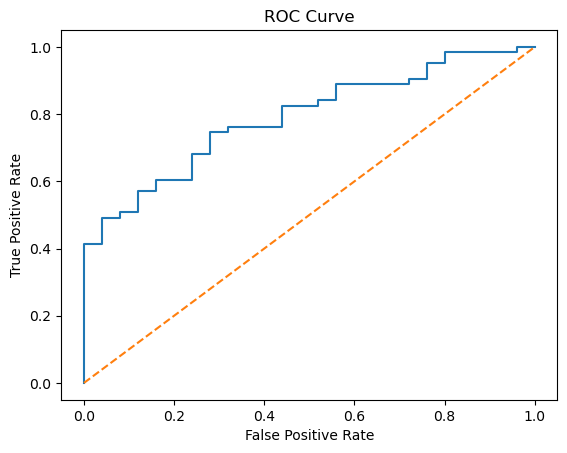

In [149]:
# make predictions on the testing set
y_pred_proba = logreg.predict_proba(X_test)[:, 1]

# compute the AUC-ROC score
auc_roc = roc_auc_score(y_test, y_pred_proba)
print("AUC-ROC score:", auc_roc)

# compute the false positive rate and true positive rate at different thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# plot the ROC curve
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')  # plot the random classifier line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [150]:
# Calculate the accuracy on the training data
train_accuracy = logreg.score(X_train, y_train)

print("Training accuracy:", train_accuracy)

from sklearn.metrics import accuracy_score

test_accuracy = accuracy_score(y_pred, y_test)
print("Test accuracy:", test_accuracy)

Training accuracy: 0.7024539877300614
Test accuracy: 0.7159090909090909


Observation :- Accuracy increased after applying SMOTE 

# Decision Tree

In [151]:
from sklearn.tree import DecisionTreeClassifier

# Building Decision Tree model 
dtc = DecisionTreeClassifier(max_depth= 8, min_samples_leaf= 1, min_samples_split=4,criterion ="entropy").fit(X_smote, y_smote)
y_pred= dtc.predict(X_test)

In [152]:
from sklearn.model_selection import GridSearchCV
# Defining hyperparameters for Grid Search
params = {
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10],
    'criterion':["gini","entropy"]
}

# Performing Grid Search to find best hyperparameters
grid_search = GridSearchCV(estimator=dtc, param_grid=params, cv=5, n_jobs=-1)
grid_search.fit(X_smote, y_smote)

# Printing best hyperparameters and score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score: 0.7489795918367347


In [153]:
metrics.f1_score(y_test,y_pred),metrics.precision_score(y_test,y_pred),metrics.recall_score(y_test,y_pred)

(0.8615384615384615, 0.835820895522388, 0.8888888888888888)

In [154]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.67      0.56      0.61        25
         1.0       0.84      0.89      0.86        63

    accuracy                           0.80        88
   macro avg       0.75      0.72      0.74        88
weighted avg       0.79      0.80      0.79        88



In [155]:
# Calculate the accuracy on the training data
train_accuracy = dtc.score(X_smote, y_smote)

print("Training accuracy:", train_accuracy)

from sklearn.metrics import accuracy_score

test_accuracy = accuracy_score(y_pred, y_test)
print("Test accuracy:", test_accuracy)

Training accuracy: 0.8224489795918367
Test accuracy: 0.7954545454545454


In [156]:
roc_auc_score(y_test, y_pred)

0.7244444444444444

# Random Forest

In [157]:
# Importing necessary libraries
from sklearn.ensemble import RandomForestClassifier

# Creating Random Forest classifier object
rf = RandomForestClassifier()

# Training the classifier
rf.fit(X_smote, y_smote)

# Predicting the test set results
y_pred = rf.predict(X_test)

In [158]:
metrics.f1_score(y_test,y_pred),metrics.precision_score(y_test,y_pred),metrics.recall_score(y_test,y_pred)

(0.8292682926829269, 0.85, 0.8095238095238095)

In [159]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.57      0.64      0.60        25
         1.0       0.85      0.81      0.83        63

    accuracy                           0.76        88
   macro avg       0.71      0.72      0.72        88
weighted avg       0.77      0.76      0.77        88



In [160]:
# Calculate the accuracy on the training data
train_accuracy = rf.score(X_smote, y_smote)

print("Training accuracy:", train_accuracy)

from sklearn.metrics import accuracy_score

test_accuracy = accuracy_score(y_pred, y_test)
print("Test accuracy:", test_accuracy)

Training accuracy: 1.0
Test accuracy: 0.7613636363636364


# Random Hyperparameter Tuning

In [161]:
# Define the hyperparameters to search over
params = {
    'n_estimators': [50, 100, 150],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4,],
    'bootstrap': [True, False],
}

# Create a grid search object with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=params, cv=5, n_jobs=-1)

# Fit the grid search object to the training data
grid_search.fit(X_smote, y_smote)

# Print the best hyperparameters and the corresponding accuracy score
print("Best hyperparameters:", grid_search.best_params_)
print("Best accuracy score:", grid_search.best_score_)

Best hyperparameters: {'bootstrap': True, 'max_depth': 15, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Best accuracy score: 0.810204081632653


In [162]:
# Creating Random Forest classifier object
rf = RandomForestClassifier(bootstrap= True, max_depth= 15, max_features= 'log2', min_samples_leaf= 1, min_samples_split= 2, n_estimators= 150)

# Training the classifier
rf.fit(X_smote, y_smote)

# Predicting the test set results
y_pred = rf.predict(X_test)

In [163]:
metrics.f1_score(y_test,y_pred),metrics.precision_score(y_test,y_pred),metrics.recall_score(y_test,y_pred)

(0.8455284552845528, 0.8666666666666667, 0.8253968253968254)

In [164]:
# Calculate the accuracy on the training data
train_accuracy = rf.score(X_smote, y_smote)

print("Training accuracy:", train_accuracy)

from sklearn.metrics import accuracy_score

test_accuracy = accuracy_score(y_pred, y_test)
print("Test accuracy:", test_accuracy)

Training accuracy: 1.0
Test accuracy: 0.7840909090909091


In [62]:
roc_auc_score(y_test, y_pred)

0.7206349206349207

# Ada Boost

In [63]:
#Using Ada Boast
from sklearn.ensemble import AdaBoostClassifier


adc= AdaBoostClassifier().fit(X_smote,y_smote)
y_pred= adc.predict(X_test)

In [64]:
metrics.f1_score(y_test,y_pred),metrics.precision_score(y_test,y_pred),metrics.recall_score(y_test,y_pred)

(0.8305084745762712, 0.8909090909090909, 0.7777777777777778)

In [65]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.58      0.76      0.66        25
         1.0       0.89      0.78      0.83        63

    accuracy                           0.77        88
   macro avg       0.73      0.77      0.74        88
weighted avg       0.80      0.77      0.78        88



In [66]:
# Calculate the accuracy on the training data
train_accuracy = adc.score(X_train, y_train)

print("Training accuracy:", train_accuracy)

from sklearn.metrics import accuracy_score

test_accuracy = accuracy_score(y_pred, y_test)
print("Test accuracy:", test_accuracy)

Training accuracy: 0.8098159509202454
Test accuracy: 0.7727272727272727


In [67]:
roc_auc_score(y_test, y_pred)

0.768888888888889

# Ada Boost Hyperparameter Tuning

In [171]:
# Define the hyperparameters to be tuned
params = {'n_estimators': [50, 100, 150],
          'learning_rate': [0.01, 0.1, 1],
          'algorithm': ['SAMME', 'SAMME.R']}

# Perform a grid search using cross-validation
grid = GridSearchCV(adc, params, cv=5, scoring='accuracy')
grid.fit(X_smote, y_smote)

# Print the best hyperparameters and corresponding score
print("Best hyperparameters: ", grid.best_params_)
print("Best accuracy: ", grid.best_score_)

Best hyperparameters:  {'algorithm': 'SAMME.R', 'learning_rate': 1, 'n_estimators': 150}
Best accuracy:  0.7489795918367347


In [172]:
adc= AdaBoostClassifier(algorithm ='SAMME.R', learning_rate= 0.1, n_estimators = 50).fit(X_smote,y_smote)
y_pred= adc.predict(X_test)

In [173]:
metrics.f1_score(y_test,y_pred),metrics.precision_score(y_test,y_pred),metrics.recall_score(y_test,y_pred)

(0.8333333333333334, 0.8771929824561403, 0.7936507936507936)

In [174]:
roc_auc_score(y_test, y_pred)

0.7568253968253968

In [175]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.58      0.72      0.64        25
         1.0       0.88      0.79      0.83        63

    accuracy                           0.77        88
   macro avg       0.73      0.76      0.74        88
weighted avg       0.79      0.77      0.78        88



Precsion and recall increases after hyperparameter tuning

# Gradient Boost

In [176]:
#Using Gradient Boost
from sklearn.ensemble import GradientBoostingClassifier

gb= GradientBoostingClassifier().fit(X_smote,y_smote)
y_pred= gb.predict(X_test)

In [177]:
metrics.f1_score(y_test,y_pred),metrics.precision_score(y_test,y_pred),metrics.recall_score(y_test,y_pred)

(0.8305084745762712, 0.8909090909090909, 0.7777777777777778)

In [178]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.58      0.76      0.66        25
         1.0       0.89      0.78      0.83        63

    accuracy                           0.77        88
   macro avg       0.73      0.77      0.74        88
weighted avg       0.80      0.77      0.78        88



In [179]:
# Calculate the accuracy on the training data
train_accuracy = gb.score(X_train, y_train)

print("Training accuracy:", train_accuracy)

from sklearn.metrics import accuracy_score

test_accuracy = accuracy_score(y_pred, y_test)
print("Test accuracy:", test_accuracy)

Training accuracy: 0.9202453987730062
Test accuracy: 0.7727272727272727


In [180]:
roc_auc_score(y_test, y_pred)

0.768888888888889

# Gradient Boost Hyperparamter Tuning

In [181]:
# Define the hyperparameter grid to search over
param_grid = {
    'n_estimators': [100, 500, 1000],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Use GridSearchCV to search over the hyperparameter grid
gb_grid_search = GridSearchCV(
    gb, param_grid, cv=5, scoring='accuracy'
)-

# Fit the GridSearchCV object to the training data
gb_grid_search.fit(X_smote, y_smote)

# Print the best hyperparameters and the corresponding accuracy score
print("Best hyperparameters:", gb_grid_search.best_params_)
y_pred = gb_grid_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:", accuracy)

Best hyperparameters: {'learning_rate': 1, 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 1000}
Test accuracy: 0.7613636363636364


In [182]:
gb= GradientBoostingClassifier(learning_rate= 1, max_depth= 7, min_samples_leaf=1, min_samples_split= 10, n_estimators= 1000).fit(X_smote,y_smote)
y_pred= gb.predict(X_test)

In [184]:
metrics.f1_score(y_test,y_pred),metrics.precision_score(y_test,y_pred),metrics.recall_score(y_test,y_pred)

(0.7999999999999999, 0.8064516129032258, 0.7936507936507936)

In [183]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.50      0.52      0.51        25
         1.0       0.81      0.79      0.80        63

    accuracy                           0.72        88
   macro avg       0.65      0.66      0.65        88
weighted avg       0.72      0.72      0.72        88



In [185]:
roc_auc_score(y_test, y_pred)

0.6568253968253968

**F1 Score, AUC-ROC decreased and precision recall increases after hyperparameter tuning**

# XG Boost

In [186]:
from sklearn.metrics import roc_auc_score
from xgboost import XGBClassifier
xg=XGBClassifier().fit(X_smote,y_smote)
y_pred=xg.predict(X_test)
metrics.f1_score(y_test,y_pred),metrics.precision_score(y_test,y_pred),metrics.recall_score(y_test,y_pred)

(0.8372093023255814, 0.8181818181818182, 0.8571428571428571)

In [187]:
roc_auc_score(y_test,y_pred)

0.6885714285714286

In [188]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.59      0.52      0.55        25
         1.0       0.82      0.86      0.84        63

    accuracy                           0.76        88
   macro avg       0.70      0.69      0.70        88
weighted avg       0.75      0.76      0.76        88



In [189]:
# Calculate the accuracy on the training data
train_accuracy = xg.score(X_train, y_train)

print("Training accuracy:", train_accuracy)

from sklearn.metrics import accuracy_score

test_accuracy = accuracy_score(y_pred, y_test)
print("Test accuracy:", test_accuracy)

Training accuracy: 1.0
Test accuracy: 0.7613636363636364


In [190]:
roc_auc_score(y_test, y_pred)

0.6885714285714286

# XG Boost Hyperparameter Tuning

In [191]:
# Define the hyperparameter grid to search over
param_grid = {
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200],
    'gamma': [0, 0.1, 0.5, 1]
}

# Use GridSearchCV to search over the hyperparameter grid
xgb_grid_search = GridSearchCV(
    xg, param_grid, cv=5, scoring='accuracy'
)

# Fit the GridSearchCV object to the training data
xgb_grid_search.fit(X_smote, y_smote)

# Print the best hyperparameters and the corresponding accuracy score
print("Best hyperparameters:", xgb_grid_search.best_params_)
y_pred = xgb_grid_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:", accuracy)

Best hyperparameters: {'gamma': 0, 'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 100}
Test accuracy: 0.7727272727272727


In [192]:
xg=XGBClassifier().fit(X_smote,y_smote)
y_pred=xg.predict(X_test)


In [193]:
metrics.f1_score(y_test,y_pred),metrics.precision_score(y_test,y_pred),metrics.recall_score(y_test,y_pred)

(0.8372093023255814, 0.8181818181818182, 0.8571428571428571)

In [194]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.59      0.52      0.55        25
         1.0       0.82      0.86      0.84        63

    accuracy                           0.76        88
   macro avg       0.70      0.69      0.70        88
weighted avg       0.75      0.76      0.76        88



In [195]:
roc_auc_score(y_test, y_pred)

0.6885714285714286

**This model overfits the data as there is no effect after hyperparameter tuning**

# Conclusion

In [197]:
oot_data = pd.read_csv("OOT_data_Jenfi_assessment_070423.csv")

In [198]:
oot_data

,Unnamed: 0,M1,M2,M3,M4,M5,M6,M7,M8,M9,M10,M11,M12,M13,M14,M15,M16,M17,M18,M19,M20,M21,M22,M23,M24,M25,M26,M27,M28,M29,M30,M31,M32,M33,M34,M35,M36,M37,M38,M39,M40,M41,M42,M43,M44,M45,M46,M47,M48,M49,M50,M51,M52,M53,M54,M55,M56,M57,M58,M59,M60,M61,M62,M63,M64,...,M87,M88,M89,M90,M91,M92,M93,M94,M95,M96,M97,M98,M99,M100,M101,M102,M103,M104,M105,M106,M107,M108,M109,M110,M111,M112,M113,M114,M115,M116,M117,M118,M119,M120,M121,M122,M123,M124,M125,M126,M127,M128,M129,M130,M131,M132,M133,M134,M135,M136,M137,M138,M139,M140,M141,M142,M143,M144,M145,M146,M147,M148,M149,M150,M151
0,172,2.794286e+05,0.0,NaN,0.142857,NaN,0.142857,NaN,2.113188e+06,0.0,4.557256e+07,0.0,1.257300e+08,1.571429,2.0,14,0.000000,3.0,0.142857,0.428571,0.000000e+00,0.0,0.000000,0.000000e+00,0.0,NaN,0,0,2.428571,0.0,NaN,1000000.0,2.205000e+14,0.5,1.123875,0.0,NaN,0.000000,0.0,NaN,NaN,NaN,7.0,7.0,6.0,2.073184e+06,NaN,1,8755428.0,NaN,956000.0,7.177382e+06,NaN,inf,0.0,8.000000,1.204300e+07,2.142857e+06,4,0.0,0.142857,-2.291686e+04,NaN,NaN,NaN,...,178.0,125,0.000000,956682.0,0.0,2.0,0.000000,1000000.0,NaN,1.000000,1.000000e+06,5019704.0,2.144416e+05,0.142857,3.028764e+05,7.900245e+15,NaN,0.000000,0.666667,0.0,1.333333,1.0,0.0,3.554369e+06,6.829441e+06,1.680639e+06,NaN,0.285714,4.286591e+05,6.663588e+06,3.550145e+06,0.142857,2.854730e+05,1.888868e+07,0.900000,2.291686e+04,0.0,8.0,0.285714,1.018747e+06,2.526316,0,0.0,0.0,0.285714,1471091.0,0.333333,0.000000,1471091.0,0.0,NaN,0.000000,0.285714,0.285714,0.0,1.600193e+05,0.000000,0.428571,0.000000e+00,1.000000,2.0,1.245265,NaN,0.000000,0.999761
1,333,2.543407e+07,0.0,0.000000e+00,3.285714,NaN,2.571429,NaN,5.587033e+06,8.0,5.609760e+07,14191650.0,1.165804e+07,6.857143,3.0,0,0.285714,325.0,4.428571,1.571429,1.404086e+06,0.0,0.714286,5.044710e+06,62143844.0,55000.0,30,0,0.092462,2639437.0,16597510.0,1007127.0,6.289461e+14,25.0,9.972064,0.0,inf,8.571429,29.0,4900000.0,NaN,7.0,5.0,14.0,11.0,3.498189e+07,1.885714e+06,80,24259987.0,9400000.0,1006378.0,2.245893e+06,1.0,0.037037,3905022.0,5.766667,4.580667e+07,5.520570e+07,0,0.0,2.285714,3.586779e+05,7.221932e+13,-4775762.0,1100000.0,...,-1124458.5,7,33.571429,11067848.0,0.0,13.0,29.142857,1007127.0,26.811720,13.200000,6.809834e+06,1340300.0,6.411309e+06,6.714286,4.283151e+06,1.097304e+13,11.800000,40.428571,83.200000,5.0,78.142857,13.5,10.5,1.916434e+07,1.278329e+07,7.545009e+06,2.0,71.571429,4.681515e+06,3.647328e+06,1.056140e+07,46.285714,4.893895e+06,5.758583e+06,39.720000,8.601064e+06,1024754.0,2.0,9.428571,4.983020e+06,0.069767,162,13.0,13.0,99.000000,6516128.0,51.857708,11.571429,3786031.0,16834478.0,3866209.0,64.142857,83.285714,30.428571,3236363.0,4.135060e+06,11.285714,57.142857,4.361425e+06,37.000000,14.0,1.011859,0.896424,0.956242,2.577387
2,479,1.012459e+08,1134035.0,0.000000e+00,3.571429,NaN,1.285714,NaN,9.885223e+06,0.0,2.795683e+06,127916014.0,NaN,1.571429,4.0,0,0.000000,17.0,7.285714,4.428571,0.000000e+00,0.0,0.000000,9.178193e+07,0.0,NaN,3,1,3.157895,0.0,NaN,310766.0,9.046273e+13,1.0,NaN,0.0,NaN,0.428571,0.0,-15070000.0,NaN,2.0,1.0,2.0,2.0,3.310748e+07,0.000000e+00,0,34916014.0,500000000.0,927400.0,0.000000e+00,0.0,2.000000,332610063.0,1.200000,6.323682e+08,5.714770e+06,1,17716621.0,1.285714,-3.882796e+06,2.179054e+14,NaN,0.0,...,39600.0,82,1.142857,2651570.0,0.0,2.0,0.571429,310766.0,NaN,NaN,8.655590e+06,85406063.0,1.500651e+08,0.000000,3.843871e+05,NaN,NaN,1.714286,0.666667,0.0,NaN,0.0,0.5,1.601037e+07,1.172782e+06,2.664463e+06,NaN,0.285714,1.353150e+07,0.000000e+00,3.891014e+05,0.428571,2.136710e+07,7.838148e+07,1.170213,5.001665e+07,7155903.0,20.0,0.000000,2.688426e+06,4.265823,0,0.0,0.0,0.428571,19990563.0,0.300000,0.000000,NaN,85916014.0,NaN,1.142857,0.571429,0.428571,0.0,0.000000e+00,2.285714,0.285714,4.980363e+07,1.166667,2.0,1.567944,inf,0.011124,1644.004255
3,401,7.225474e+06,1000000.0,0.000000e+00,4.857143,1.000000,2.285714,1.002975,2.081377e+07,2.0,5.579175e+09,124444316.0,3.944277e+09,2.571429,23.0,0,2.571429,11.0,3.142857,2.428571,3.170632e+08,2.0,4.1428

In [199]:
#replace infinite values with large finite values

oot_data.replace([np.inf, -np.inf], [1e10, -1e10],inplace=True)

#Print the updated dataframe
print(np.isnan(oot_data).sum().sum())

1149


In [200]:
oot_data

,Unnamed: 0,M1,M2,M3,M4,M5,M6,M7,M8,M9,M10,M11,M12,M13,M14,M15,M16,M17,M18,M19,M20,M21,M22,M23,M24,M25,M26,M27,M28,M29,M30,M31,M32,M33,M34,M35,M36,M37,M38,M39,M40,M41,M42,M43,M44,M45,M46,M47,M48,M49,M50,M51,M52,M53,M54,M55,M56,M57,M58,M59,M60,M61,M62,M63,M64,...,M87,M88,M89,M90,M91,M92,M93,M94,M95,M96,M97,M98,M99,M100,M101,M102,M103,M104,M105,M106,M107,M108,M109,M110,M111,M112,M113,M114,M115,M116,M117,M118,M119,M120,M121,M122,M123,M124,M125,M126,M127,M128,M129,M130,M131,M132,M133,M134,M135,M136,M137,M138,M139,M140,M141,M142,M143,M144,M145,M146,M147,M148,M149,M150,M151
0,172,2.794286e+05,0.0,NaN,0.142857,NaN,0.142857,NaN,2.113188e+06,0.0,4.557256e+07,0.0,1.257300e+08,1.571429,2.0,14,0.000000,3.0,0.142857,0.428571,0.000000e+00,0.0,0.000000,0.000000e+00,0.0,NaN,0,0,2.428571,0.0,NaN,1000000.0,2.205000e+14,0.5,1.123875,0.0,NaN,0.000000,0.0,NaN,NaN,NaN,7.0,7.0,6.0,2.073184e+06,NaN,1,8755428.0,NaN,956000.0,7.177382e+06,NaN,1.000000e+10,0.0,8.000000,1.204300e+07,2.142857e+06,4,0.0,0.142857,-2.291686e+04,NaN,NaN,NaN,...,178.0,125,0.000000,956682.0,0.0,2.0,0.000000,1000000.0,NaN,1.000000,1.000000e+06,5019704.0,2.144416e+05,0.142857,3.028764e+05,7.900245e+15,NaN,0.000000,0.666667,0.0,1.333333,1.0,0.0,3.554369e+06,6.829441e+06,1.680639e+06,NaN,0.285714,4.286591e+05,6.663588e+06,3.550145e+06,0.142857,2.854730e+05,1.888868e+07,0.900000,2.291686e+04,0.0,8.0,0.285714,1.018747e+06,2.526316,0,0.0,0.0,0.285714,1471091.0,0.333333,0.000000,1471091.0,0.0,NaN,0.000000,0.285714,0.285714,0.0,1.600193e+05,0.000000,0.428571,0.000000e+00,1.000000,2.0,1.245265,NaN,0.000000,0.999761
1,333,2.543407e+07,0.0,0.000000e+00,3.285714,NaN,2.571429,NaN,5.587033e+06,8.0,5.609760e+07,14191650.0,1.165804e+07,6.857143,3.0,0,0.285714,325.0,4.428571,1.571429,1.404086e+06,0.0,0.714286,5.044710e+06,62143844.0,55000.0,30,0,0.092462,2639437.0,16597510.0,1007127.0,6.289461e+14,25.0,9.972064,0.0,1.000000e+10,8.571429,29.0,4900000.0,NaN,7.0,5.0,14.0,11.0,3.498189e+07,1.885714e+06,80,24259987.0,9400000.0,1006378.0,2.245893e+06,1.0,3.703704e-02,3905022.0,5.766667,4.580667e+07,5.520570e+07,0,0.0,2.285714,3.586779e+05,7.221932e+13,-4775762.0,1100000.0,...,-1124458.5,7,33.571429,11067848.0,0.0,13.0,29.142857,1007127.0,26.811720,13.200000,6.809834e+06,1340300.0,6.411309e+06,6.714286,4.283151e+06,1.097304e+13,11.800000,40.428571,83.200000,5.0,78.142857,13.5,10.5,1.916434e+07,1.278329e+07,7.545009e+06,2.0,71.571429,4.681515e+06,3.647328e+06,1.056140e+07,46.285714,4.893895e+06,5.758583e+06,39.720000,8.601064e+06,1024754.0,2.0,9.428571,4.983020e+06,0.069767,162,13.0,13.0,99.000000,6516128.0,51.857708,11.571429,3786031.0,16834478.0,3866209.0,64.142857,83.285714,30.428571,3236363.0,4.135060e+06,11.285714,57.142857,4.361425e+06,37.000000,14.0,1.011859,8.964242e-01,0.956242,2.577387
2,479,1.012459e+08,1134035.0,0.000000e+00,3.571429,NaN,1.285714,NaN,9.885223e+06,0.0,2.795683e+06,127916014.0,NaN,1.571429,4.0,0,0.000000,17.0,7.285714,4.428571,0.000000e+00,0.0,0.000000,9.178193e+07,0.0,NaN,3,1,3.157895,0.0,NaN,310766.0,9.046273e+13,1.0,NaN,0.0,NaN,0.428571,0.0,-15070000.0,NaN,2.0,1.0,2.0,2.0,3.310748e+07,0.000000e+00,0,34916014.0,500000000.0,927400.0,0.000000e+00,0.0,2.000000e+00,332610063.0,1.200000,6.323682e+08,5.714770e+06,1,17716621.0,1.285714,-3.882796e+06,2.179054e+14,NaN,0.0,...,39600.0,82,1.142857,2651570.0,0.0,2.0,0.571429,310766.0,NaN,NaN,8.655590e+06,85406063.0,1.500651e+08,0.000000,3.843871e+05,NaN,NaN,1.714286,0.666667,0.0,NaN,0.0,0.5,1.601037e+07,1.172782e+06,2.664463e+06,NaN,0.285714,1.353150e+07,0.000000e+00,3.891014e+05,0.428571,2.136710e+07,7.838148e+07,1.170213,5.001665e+07,7155903.0,20.0,0.000000,2.688426e+06,4.265823,0,0.0,0.0,0.428571,19990563.0,0.300000,0.000000,NaN,85916014.0,NaN,1.142857,0.571429,0.428571,0.0,0.000000e+00,2.285714,0.285714,4.980363e+07,1.166667,2.0,1.567944,1.000000e+10,0.011124,1644.004255
3,401,7.225474e+06,1000000.0,0.000000e+00,4.857143,1.000000,2.285714,1.002975,2.081377e+07,2.0,5.579175e+09,124444316.0,3.944277e+09,2.571429,23.0,0,2.571429,11.0,3.

In [201]:
#Checking the proportion of missing values in each column of train data

missing_values_count = oot_data.isnull().sum()
total_values = oot_data.size
missing_values_percent = (missing_values_count / total_values) * 100
missing_values_percent.sort_values(ascending=False)

#Check for the columns which have null values more than 50%

drop_col = []
for i in list(oot_data.columns):
    if (oot_data[i].isnull().sum()/len(oot_data)) > .50:
        drop_col.append(i)
drop_col

#Dropping the columns which have more than 50% missing values
oot_data.drop(drop_col,axis=1,inplace=True)
oot_data.drop(["Unnamed: 0"],axis=1,inplace=True)

In [202]:
oot_data.isnull().sum()

M1       0
M2       1
M3      35
M4       0
M6       0
        ..
M147     1
M148     0
M149    20
M150    31
M151     2
Length: 140, dtype: int64

In [203]:
from sklearn.impute import KNNImputer

#knn inmputer with k=3

imputer = KNNImputer(n_neighbors=3)

#Perform KNN imputation on the dataframe

oot_imputed = pd.DataFrame(imputer.fit_transform(oot_data), columns=oot_data.columns)

oot_imputed

,M1,M2,M3,M4,M6,M8,M9,M10,M11,M12,M13,M14,M15,M16,M17,M18,M19,M20,M21,M22,M23,M24,M26,M27,M28,M29,M31,M32,M33,M34,M35,M37,M38,M41,M42,M43,M44,M45,M47,M48,M50,M51,M52,M53,M54,M55,M56,M57,M58,M59,M60,M61,M62,M63,M65,M66,M67,M68,M69,M70,M71,M73,M74,M75,M76,...,M87,M88,M89,M90,M91,M92,M93,M94,M95,M96,M97,M98,M99,M100,M101,M102,M103,M104,M105,M106,M107,M108,M109,M110,M111,M112,M113,M114,M115,M116,M117,M118,M119,M120,M121,M122,M123,M124,M125,M126,M127,M128,M129,M130,M131,M132,M133,M134,M135,M136,M137,M138,M139,M140,M141,M142,M143,M144,M145,M146,M147,M148,M149,M150,M151
0,2.794286e+05,0.0,0.000000e+00,0.142857,0.142857,2.113188e+06,0.0,4.557256e+07,0.0,1.257300e+08,1.571429,2.0,14.0,0.000000,3.0,0.142857,0.428571,0.000000e+00,0.0,0.000000,0.000000e+00,0.0,0.0,0.0,2.428571,0.0,1000000.0,2.205000e+14,0.500000,1.123875,0.0,0.000000,0.0,2.666667,7.0,7.0,6.0,2.073184e+06,1.0,8755428.0,956000.0,7.177382e+06,0.000000,1.000000e+10,0.0,8.000000,1.204300e+07,2.142857e+06,4.0,0.0,0.142857,-2.291686e+04,1.873305e+14,-1.272394e+07,8.0,4.465011e+05,1501091.0,6434310.0,6.0,0.0,2.666667,0.0,0.666667,0.142857,0.428571,...,178.0,125.0,0.000000,956682.0,0.0,2.0,0.000000,1000000.0,1.382699,1.000000,1.000000e+06,5019704.0,2.144416e+05,0.142857,3.028764e+05,7.900245e+15,0.833333,0.000000,0.666667,0.0,1.333333,1.0,0.0,3.554369e+06,6.829441e+06,1.680639e+06,0.666667,0.285714,4.286591e+05,6.663588e+06,3.550145e+06,0.142857,2.854730e+05,1.888868e+07,0.900000,2.291686e+04,0.0,8.0,0.285714,1.018747e+06,2.526316,0.0,0.0,0.0,0.285714,1471091.0,0.333333,0.000000,1.471091e+06,0.0,4.132479e+06,0.000000,0.285714,0.285714,0.0,1.600193e+05,0.000000,0.428571,0.000000e+00,1.000000,2.0,1.245265,3.333333e+09,0.000000e+00,0.999761
1,2.543407e+07,0.0,0.000000e+00,3.285714,2.571429,5.587033e+06,8.0,5.609760e+07,14191650.0,1.165804e+07,6.857143,3.0,0.0,0.285714,325.0,4.428571,1.571429,1.404086e+06,0.0,0.714286,5.044710e+06,62143844.0,30.0,0.0,0.092462,2639437.0,1007127.0,6.289461e+14,25.000000,9.972064,0.0,8.571429,29.0,7.000000,5.0,14.0,11.0,3.498189e+07,80.0,24259987.0,1006378.0,2.245893e+06,1.000000,3.703704e-02,3905022.0,5.766667,4.580667e+07,5.520570e+07,0.0,0.0,2.285714,3.586779e+05,7.221932e+13,-4.775762e+06,15.0,-1.681813e+06,2892661.0,13483963.0,0.0,77.0,33.000000,5.0,9.857143,31.000000,33.142857,...,-1124458.5,7.0,33.571429,11067848.0,0.0,13.0,29.142857,1007127.0,26.811720,13.200000,6.809834e+06,1340300.0,6.411309e+06,6.714286,4.283151e+06,1.097304e+13,11.800000,40.428571,83.200000,5.0,78.142857,13.5,10.5,1.916434e+07,1.278329e+07,7.545009e+06,2.000000,71.571429,4.681515e+06,3.647328e+06,1.056140e+07,46.285714,4.893895e+06,5.758583e+06,39.720000,8.601064e+06,1024754.0,2.0,9.428571,4.983020e+06,0.069767,162.0,13.0,13.0,99.000000,6516128.0,51.857708,11.571429,3.786031e+06,16834478.0,3.866209e+06,64.142857,83.285714,30.428571,3236363.0,4.135060e+06,11.285714,57.142857,4.361425e+06,37.000000,14.0,1.011859,8.964242e-01,9.562418e-01,2.577387
2,1.012459e+08,1134035.0,0.000000e+00,3.571429,1.285714,9.885223e+06,0.0,2.795683e+06,127916014.0,2.280248e+09,1.571429,4.0,0.0,0.000000,17.0,7.285714,4.428571,0.000000e+00,0.0,0.000000,9.178193e+07,0.0,3.0,1.0,3.157895,0.0,310766.0,9.046273e+13,1.000000,0.991482,0.0,0.428571,0.0,2.000000,1.0,2.0,2.0,3.310748e+07,0.0,34916014.0,927400.0,0.000000e+00,0.000000,2.000000e+00,332610063.0,1.200000,6.323682e+08,5.714770e+06,1.0,17716621.0,1.285714,-3.882796e+06,2.179054e+14,3.868402e+06,7.0,1.627143e+06,0.0,137016014.0,2.0,1.0,3.000000,0.0,1.000000,0.714286,1.428571,...,39600.0,82.0,1.142857,2651570.0,0.0,2.0,0.571429,310766.0,0.874790,0.555556,8.655590e+06,85406063.0,1.500651e+08,0.000000,3.843871e+05,2.833357e+14,1.833333,1.714286,0.666667,0.0,0.383333,0.0,0.5,1.601037e+07,1.172782e+06,2.664463e+06,15.333333,0.285714,1.353150e+07,0.000000e+00,3.891014e+05,0.428571,2.136710e+07,7.838148e+07,1.170213,5.001665e+07,7155903.0,20.0,0.000000,2.688426e+06,4.265823,0.0,0.0,0.0,0.428571,19990563.0,0.300000,0.000000,1.634826e+07,85916014.0,3.388371e+0

In [204]:
oot_imputed.isnull().sum().sum()

0

In [205]:
X=oot_imputed[['M87','M88','M95','M124']] #We have best features for the model for train data
#y=train_imputed['target']

In [206]:
X

,M87,M88,M95,M124
0,178.0,125.0,1.382699,8.0
1,-1124458.5,7.0,26.811720,2.0
2,39600.0,82.0,0.874790,20.0
3,0.0,33.0,1.000043,1.0
4,-22908000.0,15.0,1.125225,0.0
...,...,...,...,...
83,-4897488.0,31.0,1.025323,0.0
84,20000.0,114.0,4.342356,8.0
85,-39.0,38.0,1.781476,2.0
86,-1956660.0,37.0,0.719990,0.0


In [207]:

# Load your trained classifier
logreg = LogisticRegression(solver='newton-cg', class_weight='balanced')
logreg.fit(X_smote, y_smote)

# Use the predict_proba() method to predict the probabilities for each observation in your feature matrix
predicted_probabilities = logreg.predict_proba(X)

# Apply a threshold value of 0.5 to convert the probabilities to binary predictions
predicted_labels = np.where(predicted_probabilities[:, 1] > 0.5, 1, 0)

# Add the predicted probabilities as new columns to the original dataset
X['predicted_class_0_probability'] = predicted_probabilities[:, 0]
X['predicted_class_1_probability'] = predicted_probabilities[:, 1]


In [208]:
# Export the dataset with the predicted probabilities to a CSV file
X.to_csv('your_data_with_predicted_probabilities.csv', index=False)

In [ ]:
import os
print(os.getcwd())

I have chosen logistic regression over random forest, decision trees and boosting techniques because Logistic regression 
is less prone to overfitting than some other models, especially when the number of features is small. We have reduced our features through information value and variance inflation factor(VIF) and left with four features only which are relevant for the prediction. 



logistic regression may perform better than other models that tend to overfit.

Logistic regression has a well-understood probabilistic interpretation, which can be useful for understanding the impact of 
each feature on the outcome variable. If interpretability is important, logistic regression will be a better choice

In [102]:
results = {
    'Logistic Regression': [0.79, 0.82, 0.76, 0.78,0.70,0.71],
    'Decision Tree' : [0.86,0.84,0.88,0.72,0.82,0.80],
    'Random Forest': [0.85, 0.85, 0.85,0.76,1,0.79],
    'Ada Boost': [0.83,0.89,0.77,0,0.80,0.77],
    'Gradient Boost': [0.83,0.89,0.77,0.77,0.92,0.77],
    'XG Boost' : [0.85,0.89,0.80,0.78,0.86,0.79]
}

df = pd.DataFrame.from_dict(results, orient='index', columns=['F1 Score', 'Precision', 'Recall', 'AUC ROC Score','Training Accuracy','Test Accuracy'])

In [103]:
df

,F1 Score,Precision,Recall,AUC ROC Score,Training Accuracy,Test Accuracy
Logistic Regression,0.79,0.82,0.76,0.78,0.70,0.71
Decision Tree,0.86,0.84,0.88,0.72,0.82,0.80
Random Forest,0.85,0.85,0.85,0.76,1.00,0.79
Ada Boost,0.83,0.89,0.77,0.00,0.80,0.77
Gradient Boost,0.83,0.89,0.77,0.77,0.92,0.77
XG Boost,0.85,0.89,0.80,0.78,0.86,0.79
